### Learning, Information and Knowledge Systems Lab, SEAS, Harvard University
### Hsiang Hsu
#### hsianghsu@g.harvard.edu

# Bottleneck Problem

**Fall 2017**<br/>
**Instructors**: Professor Flavio Calmon

---

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.spatial import ConvexHull

## Information Bottleneck

I use the sample codes in https://www.tensorflow.org/get_started/mnist/beginners to get familiar with MNIST and tenrsorflow package.

In [3]:
from IB import *
from data_generation import *
import os

def test_IB_single():   
    
    # generate and visualize dataset
    ds = gen_easytest()
    ds.s = 1.
    ds.coord_to_pxy()
    ds.plot_pxy()

    # init model
    m = model(ds=ds,alpha=1,beta=5)
    
    # fit model
    m.fit(keep_steps=True)
    
    return m

def test_IB():
    
    # generate and visualize dataset
    ds = gen_easytest()
    ds.s = 1.
    ds.coord_to_pxy()
    ds.plot_pxy()
    
    # set up fit param
    fit_param = pd.DataFrame(data={'alpha': [1,0]})
    fit_param['repeats'] = 3
    
    # fit models
    metrics_conv, dist_conv, metrics_sw, dist_sw = IB(ds,fit_param)
    
    return metrics_conv, dist_conv, metrics_sw, dist_sw

## Estimation Bottleneck

## [WW'75] IV Evaluation of F
### A. Binary Symmetric Channel

TypeError: object of type 'float' has no len()

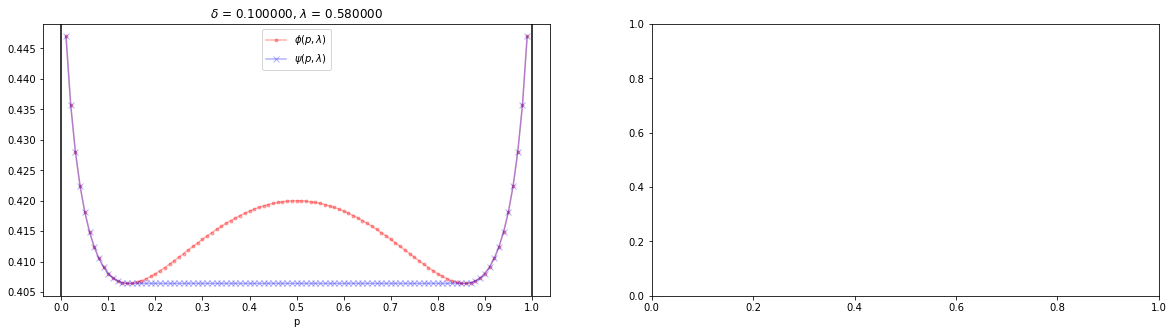

In [4]:
p_list = np.linspace(0.01, 0.99, 99)
error_prob = 0.1
l = 0.58
def hb(p):
    return -p*np.log2(p) -(1-p)*np.log2(1-p) 
def phi(p, lambda_, delta):
    return hb(delta+(1-2*delta)*p) - lambda_*hb(p)
def psi(p, lambda_, delta):
    result = []
    p_lambda = p_list[np.argmin(phi(p, lambda_, delta))]
    for i in range(len(p)):
        if p[i] >= p_lambda and p[i] <= 1 - p_lambda:
            result.append(np.min(phi(p, lambda_, delta)))
        else:
            result.append(phi(p[i], lambda_, delta))
    return result

def F_T(q, x, delta):
    temp = []
    lambda_ = np.linspace(0, 1, 101)
    for l in lambda_:
        temp.append(psi(q, l, delta) + l*x)
    return np.max(temp)

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].plot(p_list, phi(p_list, l, error_prob), 'r.-', alpha = 0.3, label='$\phi(p, \lambda)$');
ax[0].plot(p_list, psi(p_list, l, error_prob), 'bx-', alpha = 0.3, label='$\psi(p, \lambda)$');
ax[0].axvline(x = 0.0, color='k')
ax[0].axvline(x = 1.0, color='k')
ax[0].set_xticks(np.linspace(0, 1, 11));
ax[0].set_xlabel('p')
ax[0].legend(loc='best')
ax[0].set_title('$\delta$ = %f, $\lambda$ = %f'%(error_prob, l))

#print(F_T(q, x, error_prob))

X_entropy = hb(p_list)
lower_bound = []
q = 0.5
print(F_T(q, x, error_prob))
for i in range(len(X_entropy)):
    x = X_entropy[i]
    lower_bound.append(F_T(q, x, error_prob))
ax[1].plot(X_entropy, lower_bound, 'r.-', alpha = 0.3, label='$\phi(p, \lambda)$');

### B. Symmetric Binary Erasure Channel

## Our Results

## M-ary Channels

In [2]:
''' Helper Functions '''
def stochastic_matrix(n, m):
    matrix = np.random.rand(n,m)
    return matrix/matrix.sum(axis=0)

def f_divergence(f, p, q):
    result = 0
    for i in range(len(p)):
        result = result + q[i]*f(p[i]/q[i])
    return result

def phi(f, g, lambda_, p_xw, p_x, p_yw, p_y):
    result = f_divergence(f, p_xw, p_x)[0] - lambda_*f_divergence(g, p_yw, p_y)[0]
    return result

def BSC_matrix(delta):
    return np.matrix([[1-delta, delta], [delta, 1-delta]])
#def Mary_matrix()
#def noisy_typewriter()
def random_channel(n, m):
    return stochastic_matrix(n, m)

In [ ]:
T = BSC_matrix(0.1)
p_x = stochastic_matrix(m, 1)
p_y = stochastic_matrix(n, 1)

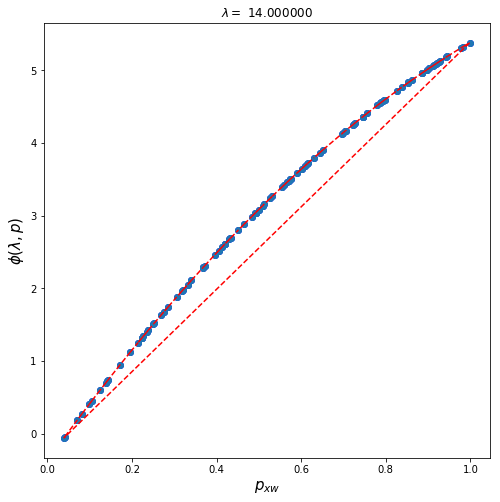

In [38]:
''' Create the Channel Transition Matrix '''
n = 2
m = 2
#T = BSC_matrix(0.1)
#p_x = stochastic_matrix(m, 1)
#p_y = stochastic_matrix(n, 1)

f_kl = lambda t: t*np.log(t)
g_kl = lambda t: t*np.log(t)

f_ci = lambda t: t**2 - 1
g_ci = lambda t: t**2 - 1

lambda_ = 14

mc_size = 100
phi_list = []
p = []
for i in range(mc_size):
    #print(i)
    p_xw = stochastic_matrix(n, 1)
    p_yw = np.dot(T, p_xw)
    
    phi_list.append(float(phi(f_ci, g_ci, lambda_, p_xw, p_x, p_yw, p_y)))
    p.append(float(p_xw[0]))
    #print(p_xw)
    #print('=================')
    #print(phi(f_kl, g_kl, lambda_, p_xw, p_x, p_yw, p_y))

plt.figure(figsize=(8, 8))
plt.plot(p, phi_list, 'bo')
#plt.xlabel('$D_f(P_{X|W}\|P_X)$', fontsize = 15)
#plt.ylabel('$D_g(P_{Y|W}\|P_Y)$', fontsize = 15)
plt.xlabel('$p_{xw}$', fontsize = 15)
plt.ylabel('$\phi(\lambda, p)$', fontsize = 15)
plt.title('$\lambda = $ %f' %lambda_)

points = np.transpose(np.vstack((p, phi_list)))
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')


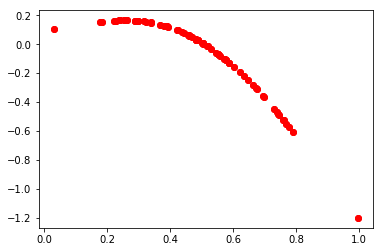

In [19]:
plt.plot(points[hull.simplices, 0], points[hull.simplices, 1], 'ro')

In [11]:
print(np.argmin(points[:, 0]))

16


In [ ]:
''' Create the Channel Transition Matrix '''
n = 2
m = 2
T = BSC_matrix(0.1)
p_x = stochastic_matrix(m, 1)
p_y = stochastic_matrix(n, 1)

f_kl = lambda t: t*np.log(t)
g_kl = lambda t: t*np.log(t)

f_ci = lambda t: t**2 - 1
g_ci = lambda t: t**2 - 1

lambda_ = 1.9

mc_size = 100
phi_list = []
p = []
for i in range(mc_size):
    #print(i)
    p_xw = stochastic_matrix(n, 1)
    p_yw = np.dot(T, p_xw)
    
    phi_list.append(float(phi(f_kl, g_kl, lambda_, p_xw, p_x, p_yw, p_y)))
    p.append(float(p_xw[0]))
    #print(p_xw)
    #print('=================')
    #print(phi(f_kl, g_kl, lambda_, p_xw, p_x, p_yw, p_y))

plt.figure(figsize=(8, 8))
plt.plot(p, phi_list, 'bo')
#plt.xlabel('$D_f(P_{X|W}\|P_X)$', fontsize = 15)
#plt.ylabel('$D_g(P_{Y|W}\|P_Y)$', fontsize = 15)
plt.xlabel('$p_{xw}$', fontsize = 15)
plt.ylabel('$\phi(\lambda, p)$', fontsize = 15)
plt.title('$\lambda = $ %f' %lambda_)

points = np.transpose(np.vstack((p, phi_list)))
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')



In [77]:
#np.random.seed(100)

''' Create the Channel Transition Matrix '''
n = 1
m = 1
p_xw = stochastic_matrix(m, 1)
T = stochastic_matrix(n,m)
p_yw = np.dot(T, p_xw)

p_x = stochastic_matrix(m, 1)
p_y = stochastic_matrix(n, 1)

f_kl = lambda t: t*np.log(t)
g_kl = lambda t: t*np.log(t)

lambda_ = 1

mc_size = 1000
phi_list = []
for i in range(mc_size):
    p_xw = stochastic_matrix(m, 1)
    phi_list.append(phi(f_kl, g_kl, lambda_, p_xw, p_x, p_yw, p_y))
    
    
    
    
print(phi(f_kl, g_kl, lambda_, p_xw, p_x, p_yw, p_y))

0.0


In [13]:
p = stochastic_matrix(1, 1)
q = stochastic_matrix(1, 1)

print(p)
print(q)
f_kl = lambda t: t*np.log(t)
print(f_divergence(f_kl, p, q))

[[ 0.23624848]
 [ 0.08746248]
 [ 0.27917688]
 [ 0.12509262]
 [ 0.27201954]]
[[ 0.16314046]
 [ 0.20348313]
 [ 0.27197534]
 [ 0.09624802]
 [ 0.26515304]]
[ 0.06066609]


In [9]:
matrix = np.random.rand(10, 5)
print(matrix/matrix.sum(axis=0))

[[ 0.1711128   0.18585547  0.12667749  0.1722065   0.11964093]
 [ 0.16320908  0.02968973  0.00414926  0.0117671   0.19950734]
 [ 0.0522137   0.08514792  0.19201998  0.07739423  0.09406118]
 [ 0.04924662  0.07206406  0.11505224  0.12455079  0.01398236]
 [ 0.0617001   0.15907198  0.18704552  0.07720522  0.02069227]
 [ 0.06568359  0.03971204  0.06562562  0.06092879  0.00246806]
 [ 0.18863181  0.10474842  0.1360541   0.12288775  0.06917972]
 [ 0.05898885  0.07974434  0.0151514   0.1707401   0.18483561]
 [ 0.18790163  0.18787022  0.00403243  0.00652935  0.1938976 ]
 [ 0.00131183  0.05609584  0.15419195  0.17579016  0.10173494]]


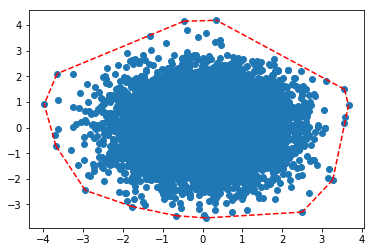

In [25]:
points = np.random.normal(0, 1, size=(10000, 2))
hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r--')

In [67]:
print(phi_list[0].shape)

(1, 1)


In [13]:
print(f_divergence(f_kl, p_x, p_y)[0])

1.45951943083


In [47]:
print(points.shape)

(2, 100)


In [27]:
print(np.vstack(([1, 2, 3], [4, 5, 6])))

[[1 2 3]
 [4 5 6]]


In [41]:
print(p)

[0.4608590366158236, 0.5391054314763023, 0.43182183848362465, 0.03373430503139351, 0.5490202361413793, 0.6190441468300831, 0.5340737235316476, 0.7417998372589094, 0.8337456818946629, 0.8033765818951015, 0.9255398656079338, 0.21017247885536586, 0.4261012425668463, 0.8798529873379611, 0.9754330649673518, 0.6624662201179605, 0.34187707686284047, 0.661218311551545, 0.2884610481312894, 0.5007421677273733, 0.9355677023244409, 0.8903517008864863, 0.14598185252524032, 0.3939972283867443, 0.24658670687082082, 0.20217378429346994, 0.4934440995730508, 0.8293241215791847, 0.9839793581954034, 0.09786366190252656, 0.27790145908299657, 0.6063233163844179, 0.4901622518225669, 0.7232243014550495, 0.2337673656785284, 0.6269351265103026, 0.45205396129939546, 0.4306404160571256, 0.8736244640416067, 0.9694283045154444, 0.5986062057188899, 0.359026702109784, 0.663452738463199, 0.5897740759609467, 0.2630002507571572, 0.04091718553203557, 0.020077762777591417, 0.5695091727429363, 0.2942708653233008, 0.0606193

In [43]:
np.matrix([1, 2, 3], [4, 5, 6])

TypeError: data type not understood